In [33]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as pyp
import csv
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

[ 999.75643789  999.75634756  999.75625678  999.75616555  999.75607386
  999.75598173  999.75588915  999.75579611  999.75570263  999.75560869
  999.75551431  999.75541947  999.75532418  999.75522845  999.75513226
  999.75503562  999.75493853  999.75484099  999.754743    999.75464456
  999.75454567  999.75444633  999.75434654  999.7542463   999.7541456
  999.75404446  999.75394286  999.75384082  999.75373833  999.75363538
  999.75353198  999.75342814  999.75332384  999.75321909  999.75311389
  999.75300825  999.75290215  999.7527956   999.7526886   999.75258115
  999.75247325  999.75236489  999.75225609  999.75214684  999.75203714
  999.75192698  999.75181638  999.75170532  999.75159382  999.75148186
  999.75136945  999.7512566   999.75114329  999.75102953  999.75091532
  999.75080067  999.75068556  999.75057     999.75045399  999.75033752
  999.75022061  999.75010325  999.74998544  999.74986718  999.74974846
  999.7496293   999.74950968  999.74938962  999.7492691   999.74914814
  999.7

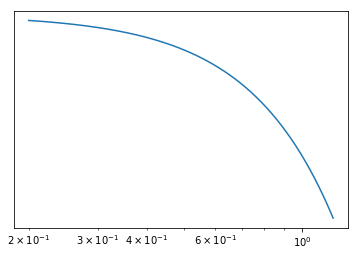

In [12]:


E0=1.0e3;

f=np.arange(0.2,1.2,step=0.001)
theta=55.8*np.pi/180;
Ein=1.0e3;

theta_c = np.arccos(1/1.78); #Radians
nu0 = 0.5; #GHz
E_LPM = 2e15/1e9; #GeV
gamma = 0.3;
if(E0<1.0e6):
  delta_theta = 2.7*(nu0/f)*E0**(-0.03);
  delta_theta = delta_theta*np.pi/180.0;
else:
  delta_theta = 2.7*(nu0/f)*((E_LPM)/(0.14*E0+E_LPM))**gamma;
  delta_theta = delta_theta*np.pi/180.0;

Eout = np.sin(theta)/np.sin(theta_c)*Ein*np.exp(-np.log(2)*(theta-theta_c)**2./(delta_theta)**2);

print(Eout)

plt.loglog(f,Eout)

50


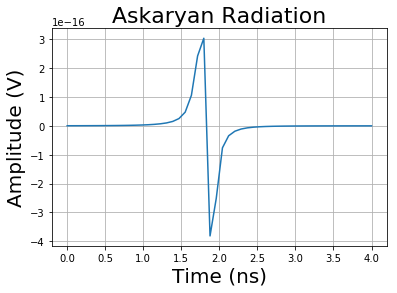

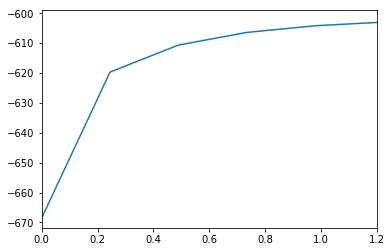

In [31]:
A=['JEshower_45.8.dat','JEshower_48.3.dat','JEshower_50.8.dat','JEshower_53.3.dat','JEshower_55.8.dat']



'''
myarray = np.loadtxt('JEshower_53.3.dat')
    
print myarray
 
for i in range(len(myarray)):
    
    plt.plot(myarray[i])
    

plt.xlabel('Time (ns)')
plt.ylabel('Electric Field (V/m)') 
'''

Impulse = np.loadtxt('JEshower_53.3.dat')

print(len(Impulse[80]))

time=np.linspace(0,4,50)

plt.grid(True)
plt.plot(time,Impulse[80])
plt.grid
plt.title('Askaryan Radiation',fontsize=22)
plt.xlabel('Time (ns)',fontsize=20)
plt.ylabel('Amplitude (V)',fontsize=20)



f = fft.fft(Impulse[80])
fshift = fft.fftshift(f)

N=len(time)
dt=time[2]-time[1]



freq = fft.fftfreq(N, dt)


plt.figure(2)
plt.plot(fft.fftshift(freq), 20*np.log10(abs(fshift*fshift)))
plt.xlim(0,1.2)

indx = abs(fshift*fshift).tolist().index(max(abs(fshift*fshift)))




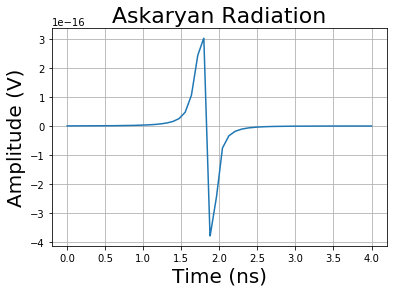

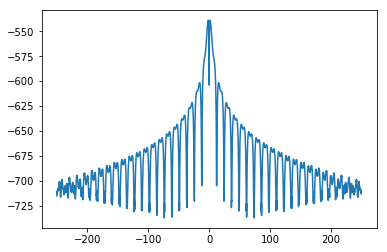

In [59]:
A=['JEshower_45.8.dat','JEshower_48.3.dat','JEshower_50.8.dat','JEshower_53.3.dat','JEshower_55.8.dat']



'''
myarray = np.loadtxt('JEshower_53.3.dat')
    
print myarray
 
for i in range(len(myarray)):
    
    plt.plot(myarray[i])
    

plt.xlabel('Time (ns)')
plt.ylabel('Electric Field (V/m)') 
'''

Impulse = np.loadtxt('JEshower_53.3.dat')

amp=Impulse[80]
time=np.linspace(0,4,50)

new_func=interp1d(time,amp)

time_new=np.linspace(0,4,2000)
amp_new=new_func(time_new)

plt.grid(True)
plt.plot(time_new,amp_new)
plt.grid
plt.title('Askaryan Radiation',fontsize=22)
plt.xlabel('Time (ns)',fontsize=20)
plt.ylabel('Amplitude (V)',fontsize=20)

#time=range(50);
#time=np.arange(0,5,.1)

f = fft.fft(amp_new)
fshift = fft.fftshift(f)

N=len(time_new)
dt=time_new[2]-time_new[1]



freq = fft.fftfreq(N, dt)


plt.figure(2)
plt.plot(fft.fftshift(freq),20*np.log10(abs(fshift*fshift)))
#plt.xlim(0.2,1.2)
#plt.ylim(-570)



